As we started our project, there were almost too many factors to consider; some early ones that we eventually rejected were air quality and school funding. Our decisions to reject or use metrics were fundamentally based not in the independent value of the metrics themselves, but rather, in the opacity of their surrounding data. Our final three factors, median age of death, number of recorded arrest incidents, and enrolled student count, were essentially decided on out of interest, but because these metrics are so different (while all still being useful), they work well together with regards to uncovering lurking variables. Our analysis did not incorporate the lurking variables we believe we've uncovered, but a future study could.

The three metrics, their explanations, and their datasets are as follows:

Median Age of Death: The median age of death dataset describes exactly what you would expect from it -- the median age of death for each neighborhood in Pittsburgh, along with their total death counts and death counts by race, is listed. This is, of course, a valuable metric; besides the fact that it provides a good indication of the crime rate in a given area as well as other factors such as the availability of healthcare, it also allows us to make inferences about the age, status, and general wellbeing of the population. If we wanted to reach even further, we could incorporate the size of the population (estiamated from number of deaths) into our analysis and predict the values of other, seemingly nonrelated factors such as noise levels. The main focus of the dataset, though, is the median age of death part, hence the name. The median age of death in a given neighborhood, being a relatively robust estimate of the true avg age of death in said neighborhood, is absolutely indicative of the overall quality of the neighborhood -- we assume it is known that people in decent conditions tend to live longer than those in unpleasant ones. Importantly, this dataset keeps track of the area of residence at the time of death, not the individuals' current locations, which makes the data more reliable in its categorizations.

Dataset: Allegheny County Median Age at Death (https://data.wprdc.org/dataset/median-age-death)







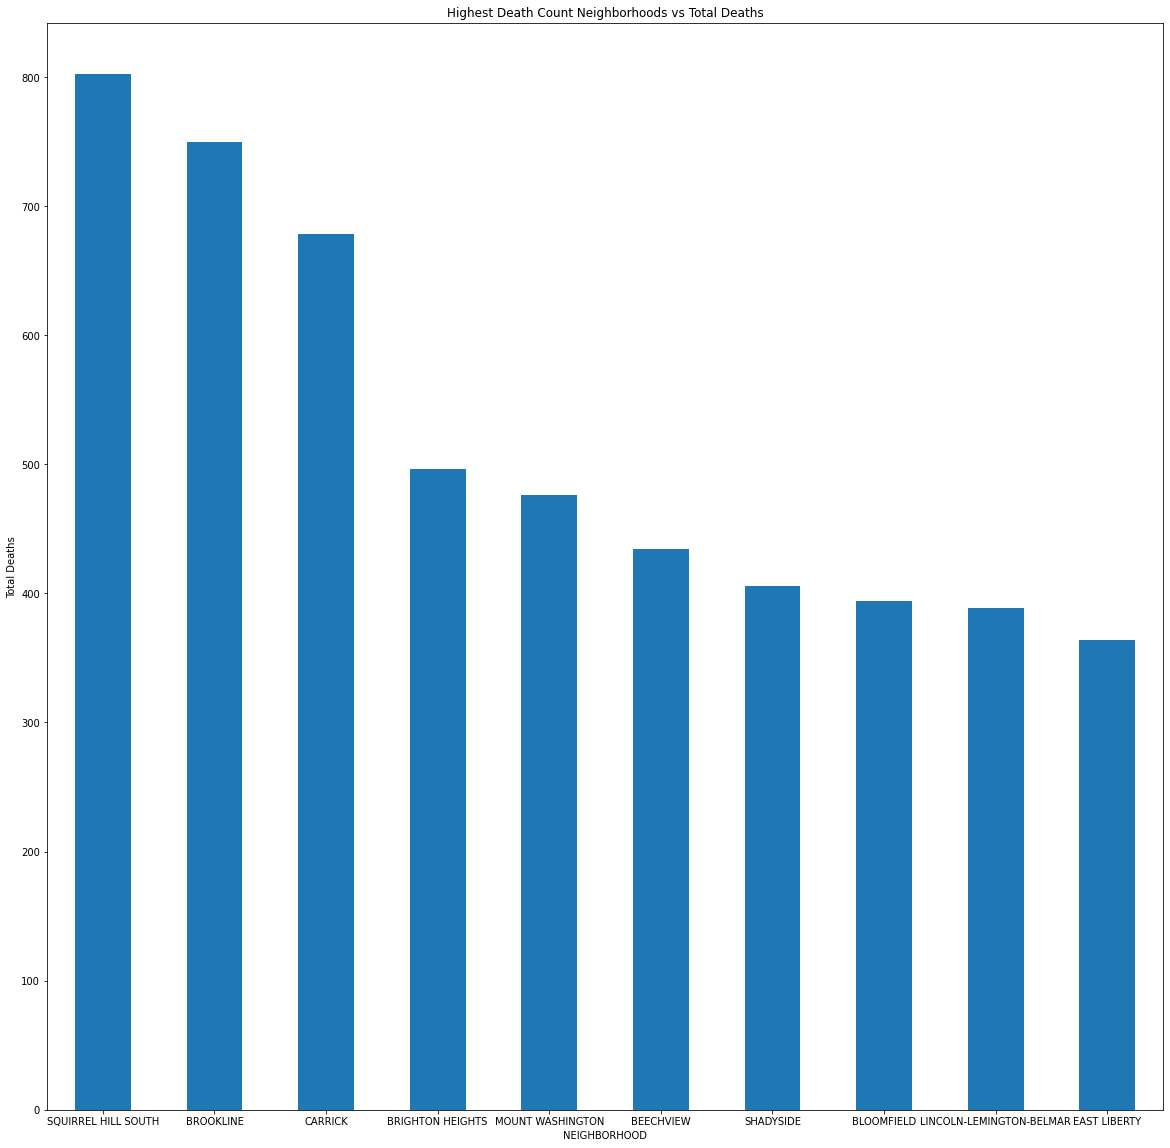

In [6]:
import pandas as pd
df = pd.read_csv("/home/jupyter-acm272/BigIdeasFinalProjectFolder/nhood.csv")
fdd = df.nlargest(10, "TOTALdeaths*")
ddf = df.nlargest(5, "TOTAL MD AGE AT DEATH")
fdd.plot(ddf.columns[0], ddf.columns[5], kind="bar", rot=0, figsize=(20,20), title = "Highest Death Count Neighborhoods vs Total Deaths", ylabel = "Total Deaths", legend=False)

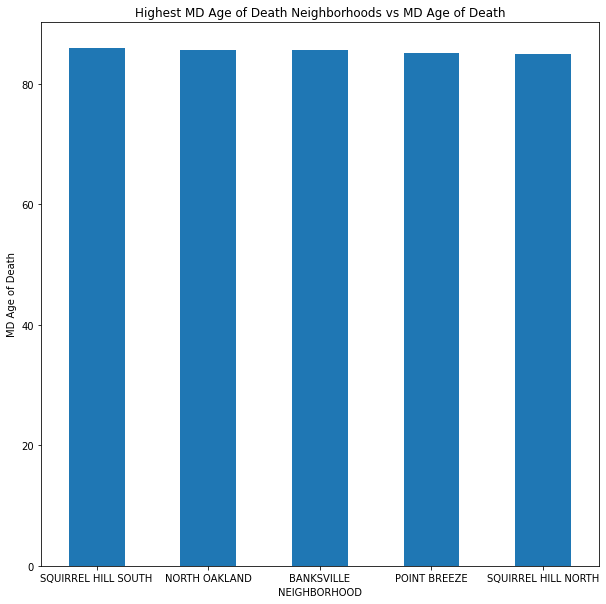

In [5]:
import pandas as pd
df = pd.read_csv("/home/jupyter-acm272/BigIdeasFinalProjectFolder/nhood.csv")
ddf = df.nlargest(5, "TOTAL MD AGE AT DEATH")
ddf.plot(ddf.columns[0], ddf.columns[6], kind="bar", rot=0, figsize=(10,10), title = "Highest MD Age of Death Neighborhoods vs MD Age of Death", ylabel = "MD Age of Death", legend=False)

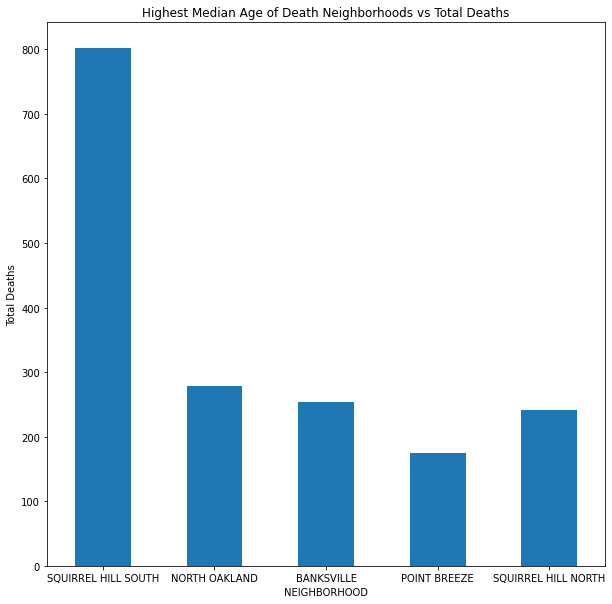

In [4]:
fdd = df.nlargest(5, "TOTAL MD AGE AT DEATH")
fdd.plot(ddf.columns[0], ddf.columns[5], kind="bar", rot=0, figsize=(10,10), title = "Highest Median Age of Death Neighborhoods vs Total Deaths", ylabel = "Total Deaths", legend=False)

Squirrel Hill South is consistently at the top of our rankings and, more importantly, it has a huge population relative to other top-scoring neighborhoods; this could be perceived as a negative aspect of it, but what it indicates is that its statistics are more likely to be indicative of the true values of avg for its population -- therefore, it is not only a potentially excellent choice as a neighborhood, but also one that is reliable to the extent that it will probably not turn out to have been horribly misrepresented in the datasets. One potential point of objection in our choice of Squirrel Hill South as the best neighborhood in Pittsburgh is that its count of deaths is suspiciously high, even for its population; however, we can combine the death count with the high median age of death to suggest that SHS might be a popular retirement area for the elderly. Typically, the retirees tend to spend a large amount of time in and about their neighborhood, and thus they would be inclined to choose a pleasant, livable one; therefore, the high death count can actually be construed to be a positive of the neighborhood and indicative of its good reputation. 

Crime Rate (Number of Arrests): The crime rate metric (as represented by number of arrests), serves as another important aspect to evaluate with respect to the quality and overall safety of  certain Pittsburgh neighborhoods. Generally, a neighborhood with a high number of arrests can tell us a lot about the area's overall qualities. While this metric not only provides a good idea of what the general safety of a neighborhood will be like, it also conveys certain traits about those who make up the neighborhood, such as possible level of income, education, etc. In our eyes, a good neighborhood is one where the individual can carry out every day tasks without fear of being harmed, while also still being surrounded by easily accessible accomdations, and other civilians. By these standards, and evaluating the number of arrests, we get a good idea of the neighborhoods which satisfy this requirement. Furthermore, by specifically evaluating higher populated neighborhoods alongside the entire set, we are able to meet at a more well reasoned answer to the best neighborhood by number of arrests.

Dataset: Pittsburgh Police Arrest Data (https://data.wprdc.org/dataset/arrest-data)

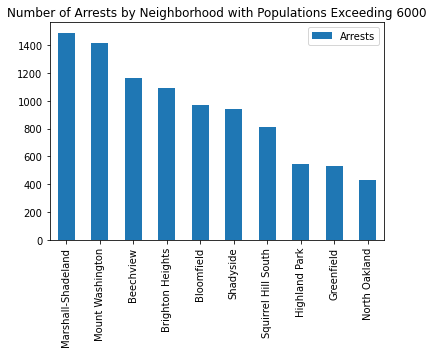

In [7]:
import pandas as pd
newpolice = pd.read_csv("policearrest.tsv", sep="\t")
query_mask = newpolice["INCIDENTNEIGHBORHOOD"].str.contains("Greenfield|Bloomfield|Marshall-Shadeland|Highland Park|Brighton Heights|Beechview|Squirrel Hill South|Mount Washington|Shadyside|North Oakland", na=False)
neighbor = newpolice[query_mask]

newarrests = pd.DataFrame(neighbor['INCIDENTNEIGHBORHOOD'].value_counts())
newarrests.rename(columns = {'INCIDENTNEIGHBORHOOD':'Arrests'}, inplace = True)

newarrests.plot(kind='bar', title= "Number of Arrests by Neighborhood with Populations Exceeding 6000")

Based on the police arrest data, North Oakland is the safest neighborhood with a population above 6,000. Specifically, if we look at the bar graph above, North Oakland had a total arrest occurence of 433. One potential reason for why this neighborhood is so much lower in arrests than others is because of its location. North Oakland is centered around both the University of Pittsburgh and Carnegie Mellon. These are two college campuses, and as a result, many students live in these areas. Serving as a multi-acadmeic hub, the neighborhood is a great location in itself for those who arn't even students, but still want to live near various restaurants, alongside dedicated individuals.

However, in 4th lowest arrest record is Squirrel Hill South. As previously mentioned in the other metric, Squirrel Hill South is a very good contender for best neighborhood. The arrest record data further emphasizes this point, with its recorded 808 arrests. This neighborhood, like North Oakland, is also fairly populated, indicating that despite encompassing a large amount of people, the area itself is generally safe. Therefore, based on the arrest record data, North Oakland is the safest, but, Squirrel Hill South may still be the best option when taking into account the other metrics as well.

School Enrollment (by student): The education metric is yet another major factor in the quality of a neighborhood. It can be assumed that neighborhoods with low levels of student enrollment have little to no schooling opportunites, and therefore the quality of the education in the area is poor. Educational oppurtunity can help indicate income and safety of a neighborhood in this instance, and therefore is related to a positive neighborhood environment. It should be noted that neighborhoods with educational oppurtunities tend to hold more families due to the educational access for their children, meaning that the overall atmosphere of a neighborhood could be correlated to the level of education within it. We think that a neigborhood with a high enrollment count (relative to its population) will demonstrate our final metric: education. Through this final metric, we can narrow our search for the best neighborhood in Pittsburgh.

Dataset: https://data.wprdc.org/dataset/pittsburgh-public-schools-enrollment/resource/7b0660d1-c812-496d-ab0a-8560902e9e70


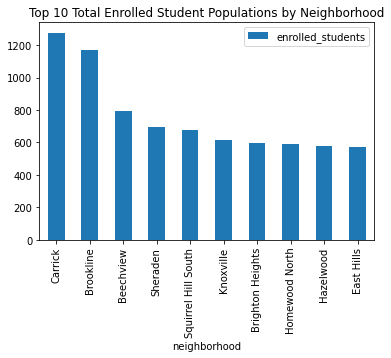

In [2]:
import pandas as pd

e = pd.read_csv("enrollment.csv")
d = e.drop(["_id","school"],axis=1)
school = d.groupby("neighborhood").sum().sort_values("enrolled_students",ascending=False)
most_enrolled = school.head(10)
most_enrolled.plot(kind='bar', title="Top 10 Total Enrolled Student Populations by Neighborhood")


Based on the total enrolled student population data, Carrick is contender for the safest neighborhood with 1276 students enrolled. However, taking into consideration the population of Carrick and its lack of appearances on our other metrics, this isn't necessarily the case. The neighborhood with the most schools within it will have the most enrolled students, since Carrick is relatively suburban this isn't necessarily a surprise.

However, Squirrel Hill South makes its appearance yet again on this chart with a whopping 679 enrolled students. With it being a suburbia and urban mix with school campuses right on its doorstep, Squirrel Hill South maintains their position as the best neighborhood in Pittsburgh based on our metrics.

----------------------Individual Conclusions Secton----------------------

Conclusion (Alex): Our data-driven determination of the best neighborhood just so happens to be my personal favorite neighborhood as well, though I don't think this is entirely coincidence. Squirrel Hill South has undeniably nice facilities and housing as shown by its median house price (435000 dollars), which, although it's nowhere near as high as Squirrel Hill North's, (1.1M dollars) is still a large barrier to entry for the neighborhood community. Additionally, it is widely known that the area contains a number of affordable, quality restraunts and it therefore attracts the copious bills of over-eager college students. Overall, it makes perfect sense to me that Squirrel Hill South could be the best neighborhood in Pittsburgh. 

Conclusion (Cole): I agree with our decision to choose Squirrel Hill South as the best neighborhood in Pittsburgh. Although it didn’t have the least number of arrests according to my data set, it did appear near the bottom, which is impressive considering its high population, and how many different neighborhoods made up the set itself. Squirrel Hill South is located very close to campus, so I could see a plethora of reasons for why someone would want to live there. The pros definitely outweigh the cons, especially in terms of what there is to do, and the safety of the neighborhood.

Conclusion (Gavin): Our conclusion that Squirrel Hill South is the best neighborhood in Pittsburgh is an accurate assessment in my opinion. Though Squirrel Hill doesn't top the charts in every one of our metrics, overall it has a level of quality in terms of safety, education, and wealth that sets it apart from the rest. Due to the proximity to the city and stores, Squirrel Hill's location in Pittsburgh offers a diverse environment that allows for exploration and activity within the area. Therefore, through all of these considerations, I can confidently say Squirrel Hill should be considered the best Pittsburgh neighborhood.